In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
def read_exaalt_output(fn):
    episode = 0
    eps = []
    steps = []
    rewards = []
    for line in open(fn):
        data = line.split()
        print(data)
        if data[0] == '1':
            episode += 1
        eps.append(episode)
        steps.append(int(data[0]))
        rewards.append(float(data[3]))
    return pd.DataFrame({'episode':eps, 'step':steps, 'reward':rewards})


In [61]:
def read_broken_async_output(fn):
    broken_rewards = []
    for line in open(fn):
        data = line.split()
        #print(data, " Length: ", len(data))
        if ((len(data) == 5) and ("Reward:" in data) and (data[3] != '0')):
            broken_rewards.append(float(data[3]))            
    print("Average: ", np.average(broken_rewards), " Max: ", np.max(broken_rewards), " Min: ", np.min(broken_rewards))
    plt.plot(broken_rewards)
    plt.show()

Average:  0.2147095239271278  Max:  0.5088888888888888  Min:  0.12222222222222222


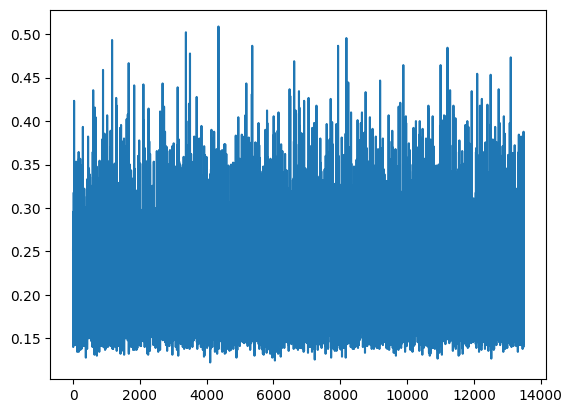

In [62]:
fn = "broken/Exaalt_async_GraphTD3-v4_ExaExaaltGraph-v4_AC_15nw_3sd_1500NoS_20Ke_100spe_longupdate.out"
read_broken_async_output(fn)

In [37]:
def moving_average(x, w=3):
    out = np.zeros_like(x)
    n   = out.size
    for ii in range(n):
        start_ind = np.max([0,ii - w])        
        end_ind   = np.min([n,ii + w])
        out[ii]   = np.mean(x[start_ind:end_ind])
    return out

In [29]:
folder = "imp3"

out_files = os.listdir(folder)

In [30]:
log_dfs = []

# log_dfs.append(read_exaalt_output("exaalt_BayesRL1.dataOutput"))
# log_dfs.append(read_exaalt_output("exaalt_BayesRL2.dataOutput"))

# log_dfs.append( pd.read_csv("exaalt/exaalt_VE/RUN000/ExaLearner_Episodes150_Steps100_Rank0_memory_v1.log", sep=' ', header=None, names=['time', 'current_state', 'action', 'reward', 'next_state', 'total_reward', 'done','episode', 'step', 'policy_type', 'epsilon', "critic_loss", "actor_loss"]))

for fn in out_files:
    if "dataOut" in fn:
        log_dfs.append(read_exaalt_output(folder+"/"+fn))


['1', '10', '9', '1.0', '9']
['1', '2', '9', '0.1111111111111111', '1']
['1', '2', '9', '0.1111111111111111', '1']
['1', '4', '9', '0.3333333333333333', '3']
['1', '3', '9', '0.2222222222222222', '2']
['1', '8', '9', '0.7777777777777778', '7']
['1', '6', '9', '0.5555555555555556', '5']
['1', '3', '9', '0.2222222222222222', '2']
['1', '2', '9', '0.1111111111111111', '1']
['1', '2', '9', '0.1111111111111111', '1']
['1', '2', '9', '0.1111111111111111', '1']
['1', '2', '9', '0.1111111111111111', '1']
['1', '5', '9', '0.4444444444444444', '4']
['1', '4', '9', '0.3333333333333333', '3']
['1', '2', '9', '0.1111111111111111', '1']
['1', '3', '9', '0.2222222222222222', '2']
['1', '4', '9', '0.3333333333333333', '3']
['1', '10', '9', '1.0', '9']
['1', '3', '9', '0.2222222222222222', '2']
['1', '4', '9', '0.3333333333333333', '3']
['1', '2', '9', '0.1111111111111111', '1']
['1', '3', '9', '0.2222222222222222', '2']
['1', '3', '9', '0.2222222222222222', '2']
['1', '5', '9', '0.4444444444444444', '

IndexError: list index out of range

In [13]:
n_cases       = len(log_dfs)
cases         = ["Process " + str(ii) for ii in np.arange(n_cases)]

episodes      = []
total_rewards = []

for case in log_dfs[:n_cases]:
    min_ep = case["episode"].min() - 1
    max_ep = case["episode"].max() + 1
    tr = []
    ep = []
    for jj in range(min_ep, max_ep):
        if np.sum(case["episode"] == (jj + 1)) > 0:
            tr.append(np.sum(case["reward"][case["episode"] == jj + 1 ].values))
            ep.append(jj)
    episodes.append(np.array(ep))
    total_rewards.append(np.array(tr))



In [14]:
plt.figure(dpi=200)
for ii in range(n_cases):
    plt.plot(episodes[ii], total_rewards[ii], linewidth=3, label=cases[ii], alpha=0.3)
# plt.plot(episodes[-1], total_rewards[-1], linewidth=3, label="TD", alpha=0.3)

# plt.legend(loc="lower right")

plt.show()

# plt.figure(dpi=200)
# for ii in range(7,14):
#     plt.plot(episodes[ii], total_rewards[ii], linewidth=3, label="Horizon "+str(horizons[ii%7]), alpha=0.3)
# # plt.plot(episodes[-1], total_rewards[-1], linewidth=3, label="TD", alpha=0.3)

# plt.legend(loc="upper right")

<Figure size 1280x960 with 0 Axes>

In [15]:
plt.figure(dpi=200)
for ii in range(n_cases):
    plt.plot(episodes[ii], total_rewards[ii], linewidth=3, label=cases[ii], alpha=0.3)
# plt.plot(episodes[-1], total_rewards[-1], linewidth=3, label="TD", alpha=0.3)

# plt.legend(loc="lower right")

plt.show()

# plt.figure(dpi=200)
# for ii in range(7,14):
#     plt.plot(episodes[ii], total_rewards[ii], linewidth=3, label="Horizon "+str(horizons[ii%7]), alpha=0.3)
# # plt.plot(episodes[-1], total_rewards[-1], linewidth=3, label="TD", alpha=0.3)

# plt.legend(loc="upper right")

<Figure size 1280x960 with 0 Axes>

In [16]:
# VE_perform = np.zeros((150,100))

# ii = 2
# min_ep = log_dfs[ii]["episode"].min()
# max_ep = log_dfs[ii]["episode"].max()
# for jj in range(min_ep, max_ep):
#     if np.sum(log_dfs[ii]["episode"] == (jj + 1)) > 0:
#         x = log_dfs[ii]["step"][log_dfs[ii]["episode"] == (jj+1)]
#         y = log_dfs[ii]["reward"][log_dfs[ii]["episode"] == (jj+1)]
#     VE_perform[jj,:] = log_dfs[ii]["reward"][log_dfs[ii]["episode"] == (jj+1)]



In [17]:
plt.figure(dpi=200)
for ii in range(20):#n_cases):
    min_ep = log_dfs[ii]["episode"].min()
    max_ep = log_dfs[ii]["episode"].max()
    for jj in range(min_ep, max_ep):
        if np.sum(log_dfs[ii]["episode"] == (jj + 1)) > 0:
            x = log_dfs[ii]["step"][log_dfs[ii]["episode"] == (jj+1)]
            y = log_dfs[ii]["reward"][log_dfs[ii]["episode"] == (jj+1)]
            plt.plot(x,y, alpha = 0.3*(jj/(max_ep-1)), linewidth=3, c=(1 - jj/(max_ep-1), 0., jj/(max_ep-1)))
    # plt.plot(np.arange(100), np.mean(VE_perform, 0), c="C2")
    # plt.plot(np.arange(100), np.quantile(VE_perform, 0.975, axis=0), c="C2")
    # plt.plot(np.arange(100), np.quantile(VE_perform, 0.025, axis=0), c="C2")
    plt.title(cases[ii])
    plt.xlabel("Step Number")
    plt.ylabel("Reward")
    plt.show()



IndexError: list index out of range

<Figure size 1280x960 with 0 Axes>